In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import sqrt
import scipy.constants as c

In [4]:
fwhms = np.array([
    ufloat(0.3618059809272232, 0.02333725319339299),
    ufloat(0.3357821530890292, 0.018965401052414097),
    ufloat(0.311658643060624, 0.01041878098836254),
    ufloat(0.39171657899880385, 0.0156649058615085),
    ufloat(0.33741305320016235, 0.02257964144369024),
    ufloat(0.4096495865642731, 0.028584162505514456),
    ufloat(0.36308726328385826, 0.021677724700378154),
    ufloat(0.3726931385967107, 0.013204978448614225),
    ufloat(0.3544779282536885, 0.012641940909920987),
    ufloat(0.4121679038966659, 0.02349357949280472)
])/49.7e-3
print(fwhms)

[7.279798408998455+/-0.46956243849885293
 6.756180142636402+/-0.3815976066884124
 6.27079764709505+/-0.20963342028898468
 7.881621307823015+/-0.3151892527466499
 6.788995034208498+/-0.45431874132173516
 8.242446409743925+/-0.5751340544369106
 7.3055787381058+/-0.4361715231464417
 7.498855907378485+/-0.26569373136044716
 7.132352681160734+/-0.25436500824790714
 8.293116778604947+/-0.47270783687735857]


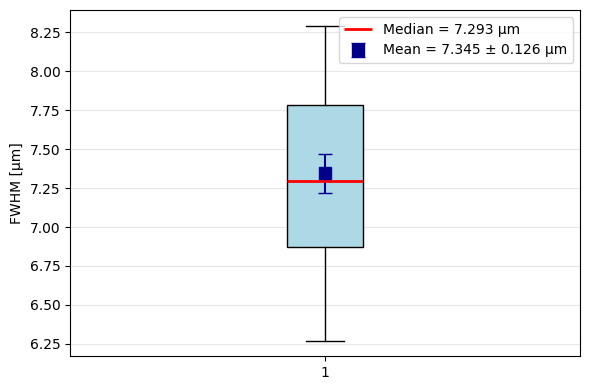

Median: 7.293 µm
Mean: 7.345 ± 0.126 µm
Std dev: 0.656 µm
Min: 6.271 µm
Max: 8.293 µm


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy

# extract nominal values for box plot
nominals = unumpy.nominal_values(fwhms)

# box plot
plt.figure(figsize=(6, 4))
box = plt.boxplot([nominals], label = [], patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red', linewidth=2, label = f"Median = {np.median(nominals):.3f} µm"),
                  meanprops=dict(marker='o', markerfacecolor='green', markeredgecolor='green'),
                  showmeans=True)  # shows mean as green dot

# add mean value with error bar (uncertainty of the mean)
mean_fwhm = np.mean(fwhms)
plt.errorbar(1, mean_fwhm.nominal_value, yerr=mean_fwhm.std_dev,
             fmt='s', color='darkblue', markersize=8, capsize=5,
             label=f'Mean = {mean_fwhm.nominal_value:.3f} ± {mean_fwhm.std_dev:.3f} µm')

plt.ylabel('FWHM [µm]')
#plt.title('Distribution of FWHM Values (10 beads)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('boxplot.jpg', dpi = 400)
plt.show()

# print statistics
print(f"Median: {np.median(nominals):.3f} µm")
print(f"Mean: {mean_fwhm.nominal_value:.3f} ± {mean_fwhm.std_dev:.3f} µm")
print(f"Std dev: {np.std(nominals, ddof=1):.3f} µm")
print(f"Min: {np.min(nominals):.3f} µm")
print(f"Max: {np.max(nominals):.3f} µm")


